In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("data/possum.csv")
df = df.drop(columns=["case"])
df["Pop"] = df["Pop"].map(lambda x: 1 if x == "Vic" else 0)
df = df.dropna()

X = df.drop(columns=["sex"]).to_numpy()
y = df["sex"].map({"m": 1, "f": 0}).astype(np.int8).to_numpy()
X.shape, y.shape

scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [2]:
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,1,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,1,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,1,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
from naive_bayes_classifier import (
    NaiveBayesClassifier,
    GaussianDistribution,
    BernoulliDistribution
)

# Получим список колонок без целевой переменной
feature_names = df.drop(columns=["sex"]).columns
print("Признаки:", feature_names.tolist())

# Создаем список распределений для каждого признака
feature_distributions = []
for feature_name in feature_names:
    if feature_name == "Pop":
        # Для бинарного признака используем распределение Бернулли
        feature_distributions.append(BernoulliDistribution())
    else:
        # Для непрерывных признаков используем нормальное распределение
        feature_distributions.append(GaussianDistribution())

# Создаем классификатор
classifier = NaiveBayesClassifier(feature_distributions)

# Обучаем модель
classifier.fit(X_train, y_train)

# Получаем предсказания
y_pred = classifier.predict(X_test)

# Оценка точности
accuracy = np.mean(y_pred == y_test)
print(f"Точность классификации: {accuracy:.3f}")

Признаки: ['site', 'Pop', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
Точность классификации: 0.762


Наша реализация:
              precision    recall  f1-score   support

      female       0.70      0.78      0.74         9
        male       0.82      0.75      0.78        12

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.77      0.76      0.76        21


Sklearn реализация:
              precision    recall  f1-score   support

      female       0.64      0.78      0.70         9
        male       0.80      0.67      0.73        12

    accuracy                           0.71        21
   macro avg       0.72      0.72      0.71        21
weighted avg       0.73      0.71      0.72        21



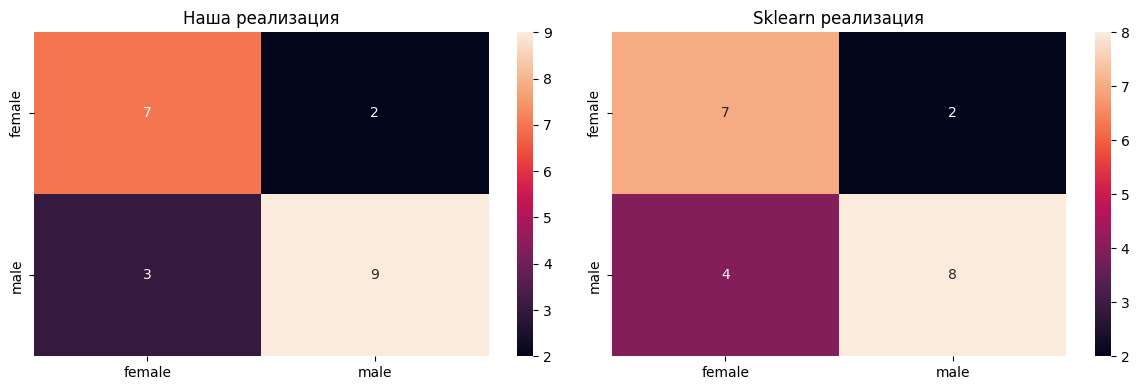


Сравнение вероятностей для первых 5 примеров:

Наша реализация:
[[0.07657937 0.92342063]
 [0.00888234 0.99111766]
 [0.56418191 0.43581809]
 [0.39370227 0.60629773]
 [0.29091469 0.70908531]]

Sklearn реализация:
[[0.07880211 0.92119789]
 [0.00915965 0.99084035]
 [0.57179386 0.42820614]
 [0.40113115 0.59886885]
 [0.29735528 0.70264472]]


In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем и обучаем модель sklearn
sklearn_nb = GaussianNB()
sklearn_nb.fit(X_train, y_train)

# Получаем предсказания
sklearn_pred = sklearn_nb.predict(X_test)
our_pred = classifier.predict(X_test)

# Сравниваем результаты
print("Наша реализация:")
print(classification_report(y_test, our_pred, target_names=['female', 'male']))
print("\nSklearn реализация:")
print(classification_report(y_test, sklearn_pred, target_names=['female', 'male']))

# Визуализируем матрицы ошибок
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Матрица ошибок для нашей реализации
sns.heatmap(confusion_matrix(y_test, our_pred), 
            annot=True, fmt='d', ax=ax1,
            xticklabels=['female', 'male'],
            yticklabels=['female', 'male'])
ax1.set_title('Наша реализация')

# Матрица ошибок для sklearn
sns.heatmap(confusion_matrix(y_test, sklearn_pred), 
            annot=True, fmt='d', ax=ax2,
            xticklabels=['female', 'male'],
            yticklabels=['female', 'male'])
ax2.set_title('Sklearn реализация')

plt.tight_layout()
plt.show()

# Сравним вероятности
our_proba = classifier.predict_proba(X_test)
sklearn_proba = sklearn_nb.predict_proba(X_test)

# Выведем несколько примеров предсказанных вероятностей
print("\nСравнение вероятностей для первых 5 примеров:")
print("\nНаша реализация:")
print(our_proba[:5])
print("\nSklearn реализация:")
print(sklearn_proba[:5])

In [5]:
import time

# Замеряем время обучения нашей реализации
start_time = time.time()
classifier.fit(X_train, y_train)
our_time = time.time() - start_time

# Замеряем время обучения sklearn реализации
start_time = time.time()
sklearn_nb.fit(X_train, y_train)
sklearn_time = time.time() - start_time

print("\nВремя обучения:")
print(f"Наша реализация: {our_time:.4f} сек")
print(f"Sklearn реализация: {sklearn_time:.4f} сек")
print(f"Наша реализация медленнее в {our_time/sklearn_time:.2f} раз")


Время обучения:
Наша реализация: 0.0005 сек
Sklearn реализация: 0.0008 сек
Наша реализация медленнее в 0.66 раз
